In [2]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
df=pd.read_csv('/content/data.csv')


In [7]:
df.head()

ad_id reporting_start reporting_end campaign_id fb_campaign_id    age  \
0  708746      17/08/2017    17/08/2017         916         103916  30-34   
1  708749      17/08/2017    17/08/2017         916         103917  30-34   
2  708771      17/08/2017    17/08/2017         916         103920  30-34   
3  708815      30/08/2017    30/08/2017         916         103928  30-34   
4  708818      17/08/2017    17/08/2017         916         103928  30-34   

  gender  interest1  interest2  interest3  impressions  clicks  spent  \
0      M         15         17         17       7350.0       1   1.43   
1      M         16         19         21      17861.0       2   1.82   
2      M         20         25         22        693.0       0   0.00   
3      M         28         32         32       4259.0       1   1.25   
4      M         28         33         32       4133.0       1   1.29   

   total_conversion  approved_conversion  
0               2.0                  1.0  
1               2.0                  0.0  
2               1.0                  0.0  
3               1.0                  0.0  
4               1.0                  1.0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   reporting_start      1143 non-null   object 
 2   reporting_end        1143 non-null   object 
 3   campaign_id          1143 non-null   object 
 4   fb_campaign_id       1143 non-null   object 
 5   age                  1143 non-null   object 
 6   gender               1143 non-null   object 
 7   interest1            1143 non-null   int64  
 8   interest2            1143 non-null   int64  
 9   interest3            1143 non-null   int64  
 10  impressions          1143 non-null   float64
 11  clicks               1143 non-null   int64  
 12  spent                1143 non-null   float64
 13  total_conversion     761 non-null    float64
 14  approved_conversion  761 non-null    float64
dtypes: float64(4), int64(5), object(6)
mem

In [9]:
df.describe()

ad_id    interest1     interest2    interest3   impressions  \
count  1.143000e+03  1143.000000  1.143000e+03  1143.000000  1.143000e+03   
mean   9.872611e+05    33.884514  1.180606e+05    42.474191  6.872500e+04   
std    1.939928e+05    27.560263  2.670506e+05    48.987248  2.067023e+05   
min    7.087460e+05     2.000000  3.000000e+00     0.000000  0.000000e+00   
25%    7.776325e+05    16.000000  2.200000e+01    19.000000  1.442650e+02   
50%    1.121185e+06    26.000000  3.300000e+01    27.000000  3.142000e+03   
75%    1.121804e+06    32.000000  9.889400e+04    38.000000  2.786400e+04   
max    1.314415e+06   120.000000  2.286228e+06   421.000000  3.052003e+06   

            clicks        spent  total_conversion  approved_conversion  
count  1143.000000  1143.000000        761.000000           761.000000  
mean     11.629921    17.597760          2.161629             0.768725  
std      27.347899    48.418711          4.062201             1.656445  
min       0.000000     0.000000          0.000000             0.000000  
25%       1.000000     0.000000          1.000000             0.000000  
50%       2.000000     1.530000          1.000000             0.000000  
75%       8.000000     8.540000          2.000000             1.000000  
max     340.000000   639.949998         60.000000            21.000000

In [14]:
df.notnull().sum()

ad_id                  1143
reporting_start        1143
reporting_end          1143
campaign_id            1143
fb_campaign_id         1143
age                    1143
gender                 1143
interest1              1143
interest2              1143
interest3              1143
impressions            1143
clicks                 1143
spent                  1143
total_conversion        761
approved_conversion     761
dtype: int64

In [15]:
# Total spent per campaign
total_spent_per_campaign = df.groupby('campaign_id')['spent'].sum().reset_index()
print(total_spent_per_campaign)


  campaign_id         spent
0        1178  16577.159998
1       30-34    166.000000
2       35-39     78.000000
3       40-44     88.000000
4       45-49    162.000000
5         916    149.710001
6         936   2893.369999


<ipython-input-16-53882938e0cb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='campaign_id', y='spent', data=df, palette='viridis', estimator=sum)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When gro

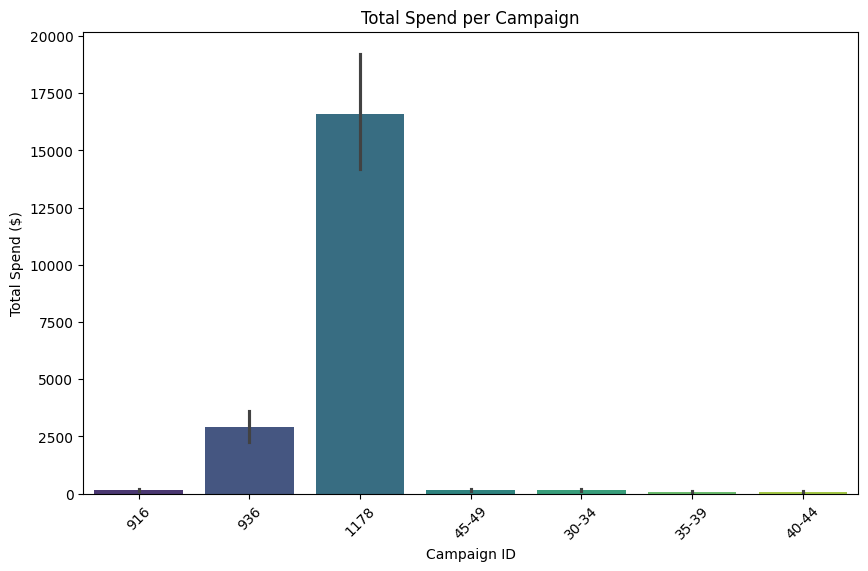

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='campaign_id', y='spent', data=df, palette='viridis', estimator=sum)
plt.title('Total Spend per Campaign')
plt.xlabel('Campaign ID')
plt.ylabel('Total Spend ($)')
plt.xticks(rotation=45)
plt.show()


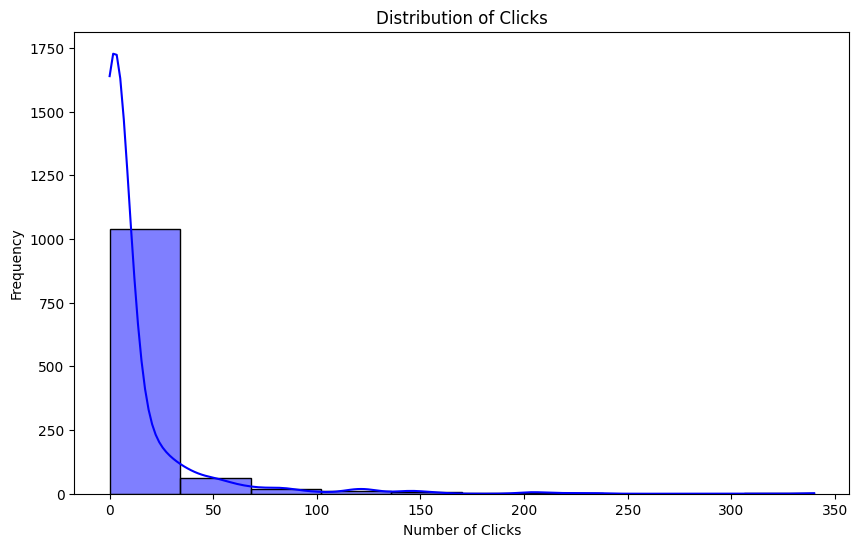

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['clicks'], bins=10, kde=True, color='blue')
plt.title('Distribution of Clicks')
plt.xlabel('Number of Clicks')
plt.ylabel('Frequency')
plt.show()
